In [36]:
import tensorflow as tf
import numpy as np

(X_data, y_data), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train, y_train = X_data[:50000,:,:], y_data[:50000]
X_valid, y_valid = X_data[50000:,:,:], y_data[50000:]
mean_vals = np.mean(X_train, axis = 0)
std_val = np.std(X_train)

X_train_centered = (X_train - mean_vals)/std_val
X_valid_centered = (X_valid - mean_vals)/std_val
X_test_centered = (X_test - mean_vals)/std_val

X_train_centered = X_train_centered.reshape((-1,28,28,1))
X_valid_centered = X_valid_centered.reshape((-1,28,28,1))
X_test_centered = X_test_centered.reshape((-1,28,28,1))

from tensorflow.keras.utils import to_categorical

y_train_onehot = to_categorical(y_train)
y_valid_onehot = to_categorical(y_valid)
y_test_onehot = to_categorical(y_test)

from tensorflow.keras import layers, models
model = models.Sequential()
model.add(layers.Conv2D(32, (5,5), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (5,5), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

import time
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard

callback_list = [ModelCheckpoint(filepath = 'cnn_checkpoint.h5', monitor='val_loss', save_best_only=True), 
                 TensorBoard(log_dir="logs/{}".format(time.asctime()))]
history = model.fit(X_train_centered, y_train_onehot, batch_size=64, epochs=20, validation_data=(X_valid_centered, y_valid_onehot),
                   callbacks=callback_list)

Epoch 1/20
782/782 [==============================] - 9s 11ms/step - loss: 0.2982 - acc: 0.9055 - val_loss: 0.0497 - val_acc: 0.9847
Epoch 2/20
782/782 [==============================] - 9s 11ms/step - loss: 0.0519 - acc: 0.9838 - val_loss: 0.0436 - val_acc: 0.9870
Epoch 3/20
782/782 [==============================] - 9s 11ms/step - loss: 0.0370 - acc: 0.9878 - val_loss: 0.0363 - val_acc: 0.9885
Epoch 4/20
782/782 [==============================] - 9s 11ms/step - loss: 0.0278 - acc: 0.9905 - val_loss: 0.0430 - val_acc: 0.9887
Epoch 5/20
782/782 [==============================] - 9s 11ms/step - loss: 0.0203 - acc: 0.9938 - val_loss: 0.0405 - val_acc: 0.9907
Epoch 6/20
782/782 [==============================] - 9s 11ms/step - loss: 0.0190 - acc: 0.9941 - val_loss: 0.0383 - val_acc: 0.9904
Epoch 7/20
782/782 [==============================] - 9s 11ms/step - loss: 0.0161 - acc: 0.9945 - val_loss: 0.0350 - val_acc: 0.9914
Epoch 8/20
782/782 [==============================] - 9s 11ms/step - 

In [3]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
epochs = np.arange(1,21)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])


NameError: name 'history' is not defined

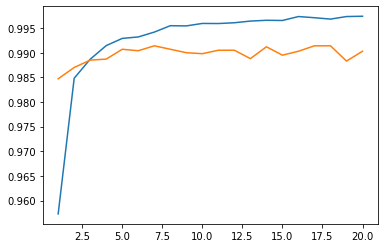

In [39]:
plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])

In [4]:
model.save('cnn_model.h5')

NameError: name 'model' is not defined

In [5]:
from tensorflow.keras.models import load_model

restored_model = load_model('cnn_model.h5')
restored_model.load_weights('cnn_checkpoint.h5')

In [8]:
import tensorflow as tf
import numpy as np

(X_data, y_data), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train, y_train = X_data[:50000,:,:], y_data[:50000]
X_valid, y_valid = X_data[50000:,:,:], y_data[50000:]
mean_vals = np.mean(X_train, axis = 0)
std_val = np.std(X_train)

X_train_centered = (X_train - mean_vals)/std_val
X_valid_centered = (X_valid - mean_vals)/std_val
X_test_centered = (X_test - mean_vals)/std_val

X_train_centered = X_train_centered.reshape((-1,28,28,1))
X_valid_centered = X_valid_centered.reshape((-1,28,28,1))
X_test_centered = X_test_centered.reshape((-1,28,28,1))
from tensorflow.keras.utils import to_categorical

y_train_onehot = to_categorical(y_train)
y_valid_onehot = to_categorical(y_valid)
y_test_onehot = to_categorical(y_test)

restored_model.evaluate(X_test_centered, y_test_onehot)


313/313 [==============================] - 1s 1ms/step - loss: 0.0243 - acc: 0.9926


[0.02427910827100277, 0.9926000237464905]

In [9]:
X_test_centered.shape

(10000, 28, 28, 1)

In [10]:
np.argmax(restored_model.predict(X_test_centered[:10]), axis = 1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [11]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

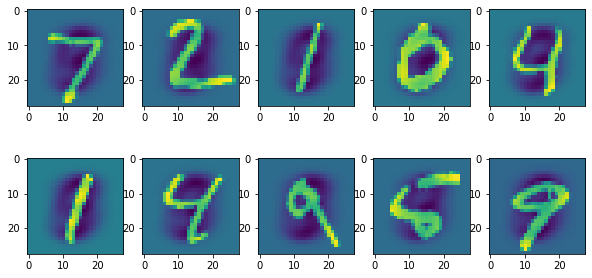

In [12]:
fig = plt.figure(figsize=(10,5))
for i in range(10):
    fig.add_subplot(2,5,i+1)
    plt.imshow(X_test_centered[i])

In [23]:
from tensorflow.keras import layers, models
model = models.Sequential()
model.add(layers.Conv2D(32, (5,5), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (5,5), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

first_layer = model.layers[0]
print(first_layer.kernel)
print(first_layer.output)

<tf.Variable 'conv2d_2/kernel:0' shape=(5, 5, 1, 32) dtype=float32, numpy=
array([[[[ 6.01508319e-02,  7.94726163e-02, -4.20948081e-02,
           2.08448395e-02, -4.72003333e-02, -3.17507982e-02,
          -8.16797167e-02,  1.96553543e-02, -1.63560584e-02,
           4.44708169e-02, -6.88691661e-02,  5.34456372e-02,
          -3.40079516e-03, -6.60504475e-02, -2.75089107e-02,
          -5.40874153e-03,  6.31923229e-02, -3.00091840e-02,
          -3.75301018e-02,  5.07859141e-02,  1.08515471e-02,
           2.42054835e-02, -8.07712674e-02, -5.93139753e-02,
          -5.76793402e-03,  3.89822423e-02, -6.68090433e-02,
           9.52790678e-03,  4.63793874e-02, -4.74906825e-02,
          -9.35591757e-03, -6.53088838e-02]],

        [[ 7.53614604e-02,  1.90755799e-02, -1.39005557e-02,
          -7.61675239e-02,  8.42820257e-02, -1.80025771e-02,
           3.96785140e-03, -6.19358793e-02,  6.44501001e-02,
          -6.70080781e-02,  7.78990537e-02, -7.36012310e-02,
          -1.37157962e-0

In [18]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


(10, 24, 24, 32)


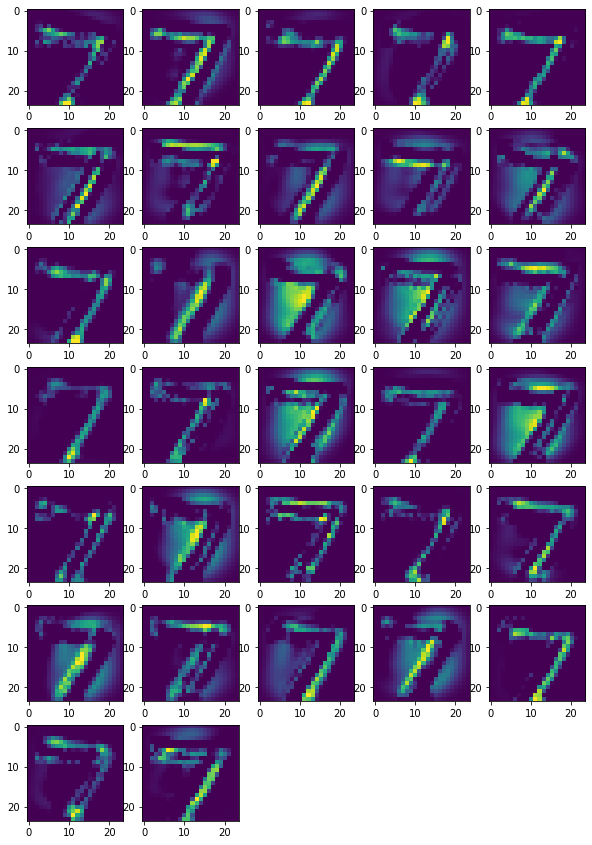

In [21]:
first_activation = models.Model(inputs=model.input, outputs=first_layer.output)
activation = first_activation.predict(X_test_centered[:10])
print(activation.shape)
fig = plt.figure(figsize=(10,15))
for i in range(32):
    fig.add_subplot(7, 5, i+1)
    plt.imshow(activation[0,:,:,i])

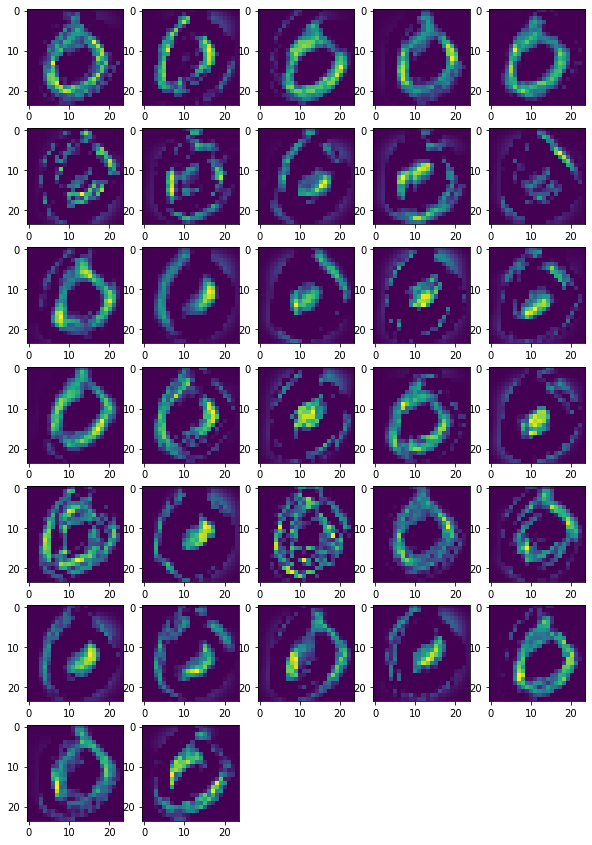

In [22]:
fig = plt.figure(figsize=(10,15))
for i in range(32):
    fig.add_subplot(7, 5, i+1)
    plt.imshow(activation[3,:,:,i])

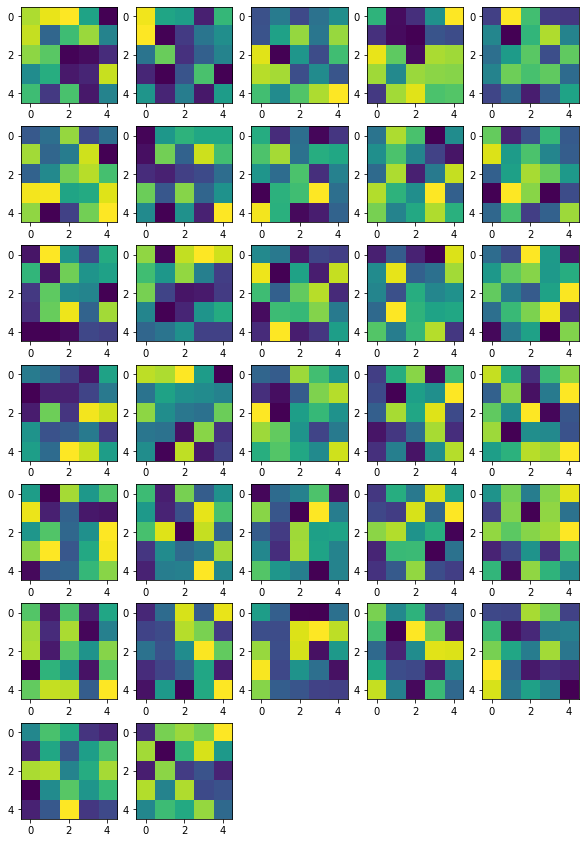

In [24]:
fig = plt.figure(figsize=(10,15))
for i in range(32):
    fig.add_subplot(7,5,i+1)
    plt.imshow(first_layer.kernel[:,:,0,i])

In [5]:
import tensorflow as tf
tf.debugging.set_log_device_placement(True)


# 텐서 생성
a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
c = tf.matmul(a, b)

print(c)

Executing op MatMul in device /job:localhost/replica:0/task:0/device:CPU:0
tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [3]:
import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
tf.config.list_physical_devices("GPU")

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13103775582607618835
]


[]